In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import PDB
import os

output_folder = "C:/Users/shuyu/Desktop/03_06_results"
os.makedirs(output_folder, exist_ok=True)


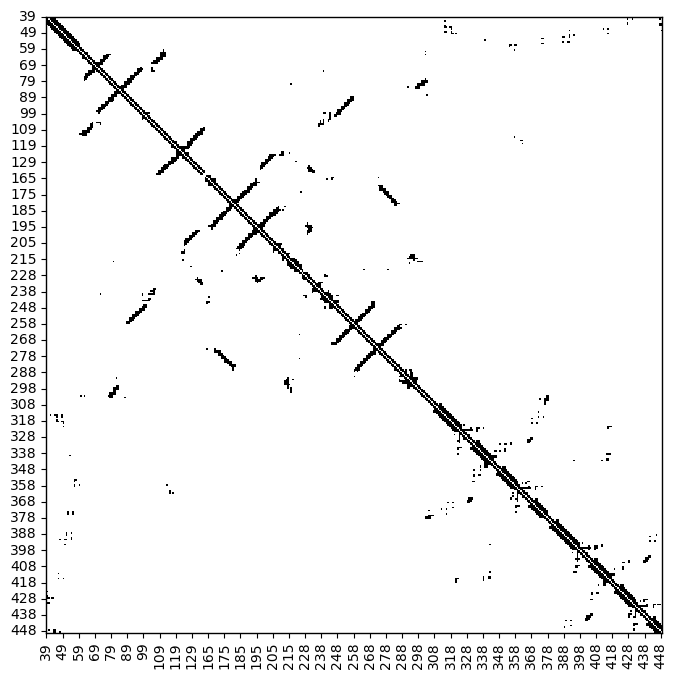

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import PDB

def compute_contact_map(pdb_file, chain_id='A', threshold=8.0):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    
    # 获取指定链的残基
    model = structure[0]  # 仅使用第一个模型
    chain = model[chain_id]
    residues = [res for res in chain if PDB.is_aa(res, standard=True)]
    
    n = len(residues)
    contact_map = np.zeros((n, n))
    
    # 计算 Cα 原子之间的距离
    for i, res1 in enumerate(residues):
        for j, res2 in enumerate(residues):
            if i < j:  # 只计算上三角矩阵
                ca1 = res1['CA'].coord
                ca2 = res2['CA'].coord
                distance = np.linalg.norm(ca1 - ca2)
                if distance < threshold:
                    contact_map[i, j] = contact_map[j, i] = 8  # 低于阈值的标记为接触
    
    return contact_map, [res.get_id()[1] for res in residues]

def plot_contact_map(distance_map, residue_ids):
    plt.figure(figsize=(8, 8))
    ax = sns.heatmap(distance_map, cmap='Greys', square=True, cbar=False)
    
    # 添加边框
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1)
    
    plt.xticks(ticks=np.arange(0, len(residue_ids), 10), labels=residue_ids[::10], rotation=90)
    plt.yticks(ticks=np.arange(0, len(residue_ids), 10), labels=residue_ids[::10], rotation=0)
    output_file = os.path.join(output_folder, "contact_map.pdf")
    plt.savefig(output_file, format='pdf')
    plt.show()


# 示例使用
pdb_file = "C:/Users/shuyu/Desktop/structures/4i2y.pdb"  # 替换为你的 PDB 文件
contact_map, residue_ids = compute_contact_map(pdb_file, chain_id='A', threshold=8.0)
plot_contact_map(contact_map, residue_ids)

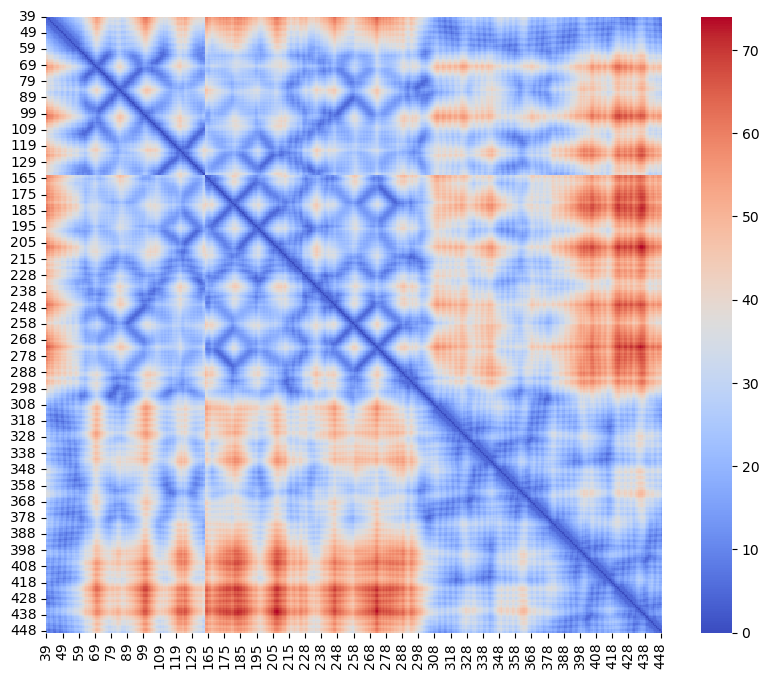

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import PDB

def compute_distance_map(pdb_file, chain_id='A'):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    
    # 获取指定链的残基
    model = structure[0]  # 仅使用第一个模型
    chain = model[chain_id]
    residues = [res for res in chain if PDB.is_aa(res, standard=True)]
    
    n = len(residues)
    distance_map = np.zeros((n, n))
    
    # 计算 Cα 原子之间的距离
    for i, res1 in enumerate(residues):
        for j, res2 in enumerate(residues):
            ca1 = res1['CA'].coord
            ca2 = res2['CA'].coord
            distance = np.linalg.norm(ca1 - ca2)
            distance_map[i, j] = distance_map[j, i] = distance
    
    return distance_map, [res.get_id()[1] for res in residues]

def plot_distance_map(distance_map, residue_ids):
    plt.figure(figsize=(10, 8))
    sns.heatmap(distance_map, cmap='coolwarm', square=True)
    plt.xticks(ticks=np.arange(0, len(residue_ids), 10), labels=residue_ids[::10], rotation=90)
    plt.yticks(ticks=np.arange(0, len(residue_ids), 10), labels=residue_ids[::10], rotation=0)
    output_file = os.path.join(output_folder, "diatance_map.pdf")
    plt.savefig(output_file, format='pdf')
    plt.show()

pdb_file = "C:/Users/shuyu/Desktop/structures/4i2y.pdb"  # 替换为你的 PDB 文件
distance_map, residue_ids = compute_distance_map(pdb_file, chain_id='A')
plot_distance_map(distance_map, residue_ids)

